
# <font color="Blue">**[1일차 오후] 객체인식을 위한 이미지데이터 수집** <font>

## <font color="red">**1일차 최종 제출물은 본 ipynb 파일입니다.**
- 조별로 완성된 본 파일을 " 1일차_OO반_OO조.ipynb" 로 파일명을 작성하시어 제출하시고 추출된 이미지데이터셋(130장)를 "1일차_OO반_OO조.zip"으로 압축하여 제출 바랍니다.


# 앞서 배운 내용을 중심으로 본격적으로 이미지 데이터 수집을 위한 전단계 진행하봅니다.
# 사전 준비할 사항이 있습니다.
* car_bike.mp4 파일을 본인 노트북에 다운로드해 주세요

----

# <font color="red">**[미션1]  CCTV 폴더를 만들어 안전모 사례와 동일하게 tutorial 폴더와 image, image30, image100 폴더를 만들어, 캡쳐한 이미지를 각 폴더에 저장해 주세요**
- CCTV폴더 생성
- CCTV > tutorial , CCTV>image, CCTV>image100, CCTV>image30 폴더 생성
- CCTV > tutorial 에 car_bike.mp4 영상 저장
- CCTV>image에는 영상의 전체 프레임 이미지 추출
- CCTV>image100 에는 100프레임부터 200프레임 이미지만 추출
- CCTV>image30 에는 30 프레임단위로 이미지 추출 (30, 60, 90, 120....)

## <font color="Blue">**1. 환경 설정하기**<font>

### **1) 구글 드라이브 연결하기**

In [74]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2) 경로 확인하기**
<font color="red">※ 주의. 경로는 절대 변경하지 마세요.</font>

In [9]:
# ROOT_PATH 확인 
import os
if os.path.exists("/content/drive/MyDrive/CCTV") :  #경로가 있는지 확인  
  ROOT_PATH = "/content/drive/MyDrive/CCTV"
  print("CCTV 폴더가 잘생성되어 있습니다.")
else :
  print("/content/drive/MyDrive에 'CCTV' 폴더를 생성해 주세요")
# TUTORIAL 데이터 경로

if os.path.exists( ROOT_PATH + "/tutorial") :  #경로가 있는지 확인  
  TUTORIAL_PATH = ROOT_PATH + "/tutorial"
  print("CCTV/tutorial 폴더가 잘생성되어 있습니다.")
else :
  print("'CCTV' 폴더 밑에 'tutorial'를 생성해 주세요")

CCTV 폴더가 잘생성되어 있습니다.
CCTV/tutorial 폴더가 잘생성되어 있습니다.


In [10]:
print(TUTORIAL_PATH)
print(ROOT_PATH)

/content/drive/MyDrive/CCTV/tutorial
/content/drive/MyDrive/CCTV


### **3) 라이브러리 불러오기**
필요시 추가 라이브러리는 설치해서 사용하세요.

In [12]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  
#쥬피터노트북에서 바로 그림을 볼수 있게 하는 역할


---

## <font color="Blue">**2. 데이터 불러오기**<font>
* OpenCV 라이브러리를 활용해서 영상 파일("car_bke.mp4")을 불러오고, 변수명 video에 저장하세요. 
   
    >* 파일경로 TUTORAL_PATH에 저장된 car_bike.mp4 파일을 video라는 변수에 저장하세요.
    >* 저장된 영상 파일의 정보를 확인하세요.(영상의 가로, 세로, 총 프레임 수, fps 정보, 영상 길이)


### <font color="green">**[실습1]  파일경로 TUTORIAL_PATH 내 "car_bike.mp4" 파일을 가져와서 어떤 영상인지 플레이해 보세요.** </font>

<font color="red">**[미션 1.1] cv2를 이용해 video라는 변수에 car_bike.mp4 파일 로딩하기**</font>  

In [15]:
#####- 분석하고자 하는 비디오를 video라는 변수에 저장하기
# 파일경로 TUTORIAL_PATH 내 "tutorial.mp4" 파일을 cv2.VideoCapture()함수를 사용해 video에 저장해보기 
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

In [16]:
# video가 열렸는지 확인해보기(열렸다는 의미는 메모리에 video파일이 올라와 있어, 정보와 이미지를 추출할 준비가 되어 있다는 의미임)
# 참고로 video.isOpened()가 False이면 데이터를 가지고 올수 없고, True일때만 가능함

video.isOpened()

True

<font color="red">**[미션 1.2] video 파일을 열어서 해당 화면으로 영상을 플레이해보기**
-  구글에서 "코랩에서 비디오 재생"이라고 검색
- " https://whiteduck.tistory.com/160 " 참조

In [17]:
# 파일 루트만 변경합니다.

from IPython.display import HTML
from base64 import b64encode
mp4 = open(TUTORIAL_PATH+'/car_bike.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


Output hidden; open in https://colab.research.google.com to view.

### <font color="green">**[실습2] 영상 파일의 정보를 확인하세요.**</font>
> 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이 정보입니다.

<font color="red">**[미션 2.1]  video, 즉 영상의 정보를 가지고 오세요(https://deep-learning-study.tistory.com/107)**</font>

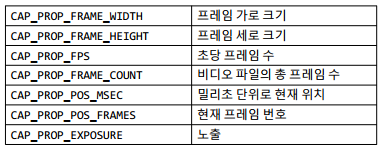

In [19]:
# 영상의 정보들을 가지고 옵니다.


# 우선 열려있는 video를 닫고 다시 로딩하는 것이 메모리에 좋습니다.
video.release()
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

########### 함께 해보기 - 저장된 비디오의 정보 몇개만 확인해보기
# 영상의 가로, 세로, 총 프레임 수, FPS 정보로 가지고 옵니다.
video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH) # 미프

video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)

video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)

video_fps = video.get(cv2.CAP_PROP_FPS)

print("가로 :", video_width)
print("세로 :", video_height)
print("총 프레임 수 :", video_length)
print("FPS :", video_fps)

#해당 비디오를 가지고 이용한 후에는 해당 비디오를 메모리에세 제거하기 위해 release함수를 호출합니다.
video.release()


가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 274.0
FPS : 23.976023976023978


In [20]:
# 총 영상의 길이는 FPS와 프레임수를 알면 됩니다. 전체영상시간(초) = 전체프레임수/(초당프레임수), 예시.전체가 600프레임이고, 60 FPS이면, 전체 시간은 10초


total_time = round(video_length / video_fps)
print(f"영상길이: {total_time}")


영상길이: 11


---



## <font color="Blue">**3. 영상으로부터 이미지 데이터 추출하기**
* OpenCV 라이브러리를 활용해서 영상 파일("car_bike.mp4")을 불러온 후, 모든 프레임 또는 일부 프레임을 저장해봅니다.
   
    >* 파일경로 TUTORAL_PATH>image 
    >* 총 몇개의 파일들이 저장되었는지 확인


### <font color="green">**[실습3]동영상에서 이미지 컷 하나만 가지고와서 저장해 보세요**

#### <font color="red">**[미션 3.1] 동영상에서 프레임 이미지 하나만 가지고 와 보세요.** 
- **영상의 프레임 하나만 이미지로 가지고 오기** (**video.read()**활용)
- https://thinking-developer.tistory.com/61

In [21]:
# 코랩에서는 cv2의 imshow가 안되기 때문에 다른 방법으로 진행해야 함
# https://overface.tistory.com/573

from google.colab.patches  import cv2_imshow

비디오가 열려 있나요?:  True
1  번째 프레임을 읽었습니다.
프레임을 읽었는지요?:  True
읽은 프레임의 이미지데이터(numpy형태)는?  
 [[[81 87 82]
  [82 88 83]
  [81 87 82]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[82 88 83]
  [82 88 83]
  [81 87 82]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[82 88 83]
  [83 89 84]
  [82 88 83]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[56 49 41]
  [56 49 41]
  [56 49 41]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[47 41 36]
  [47 41 36]
  [47 41 36]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[43 37 32]
  [43 37 32]
  [43 37 32]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


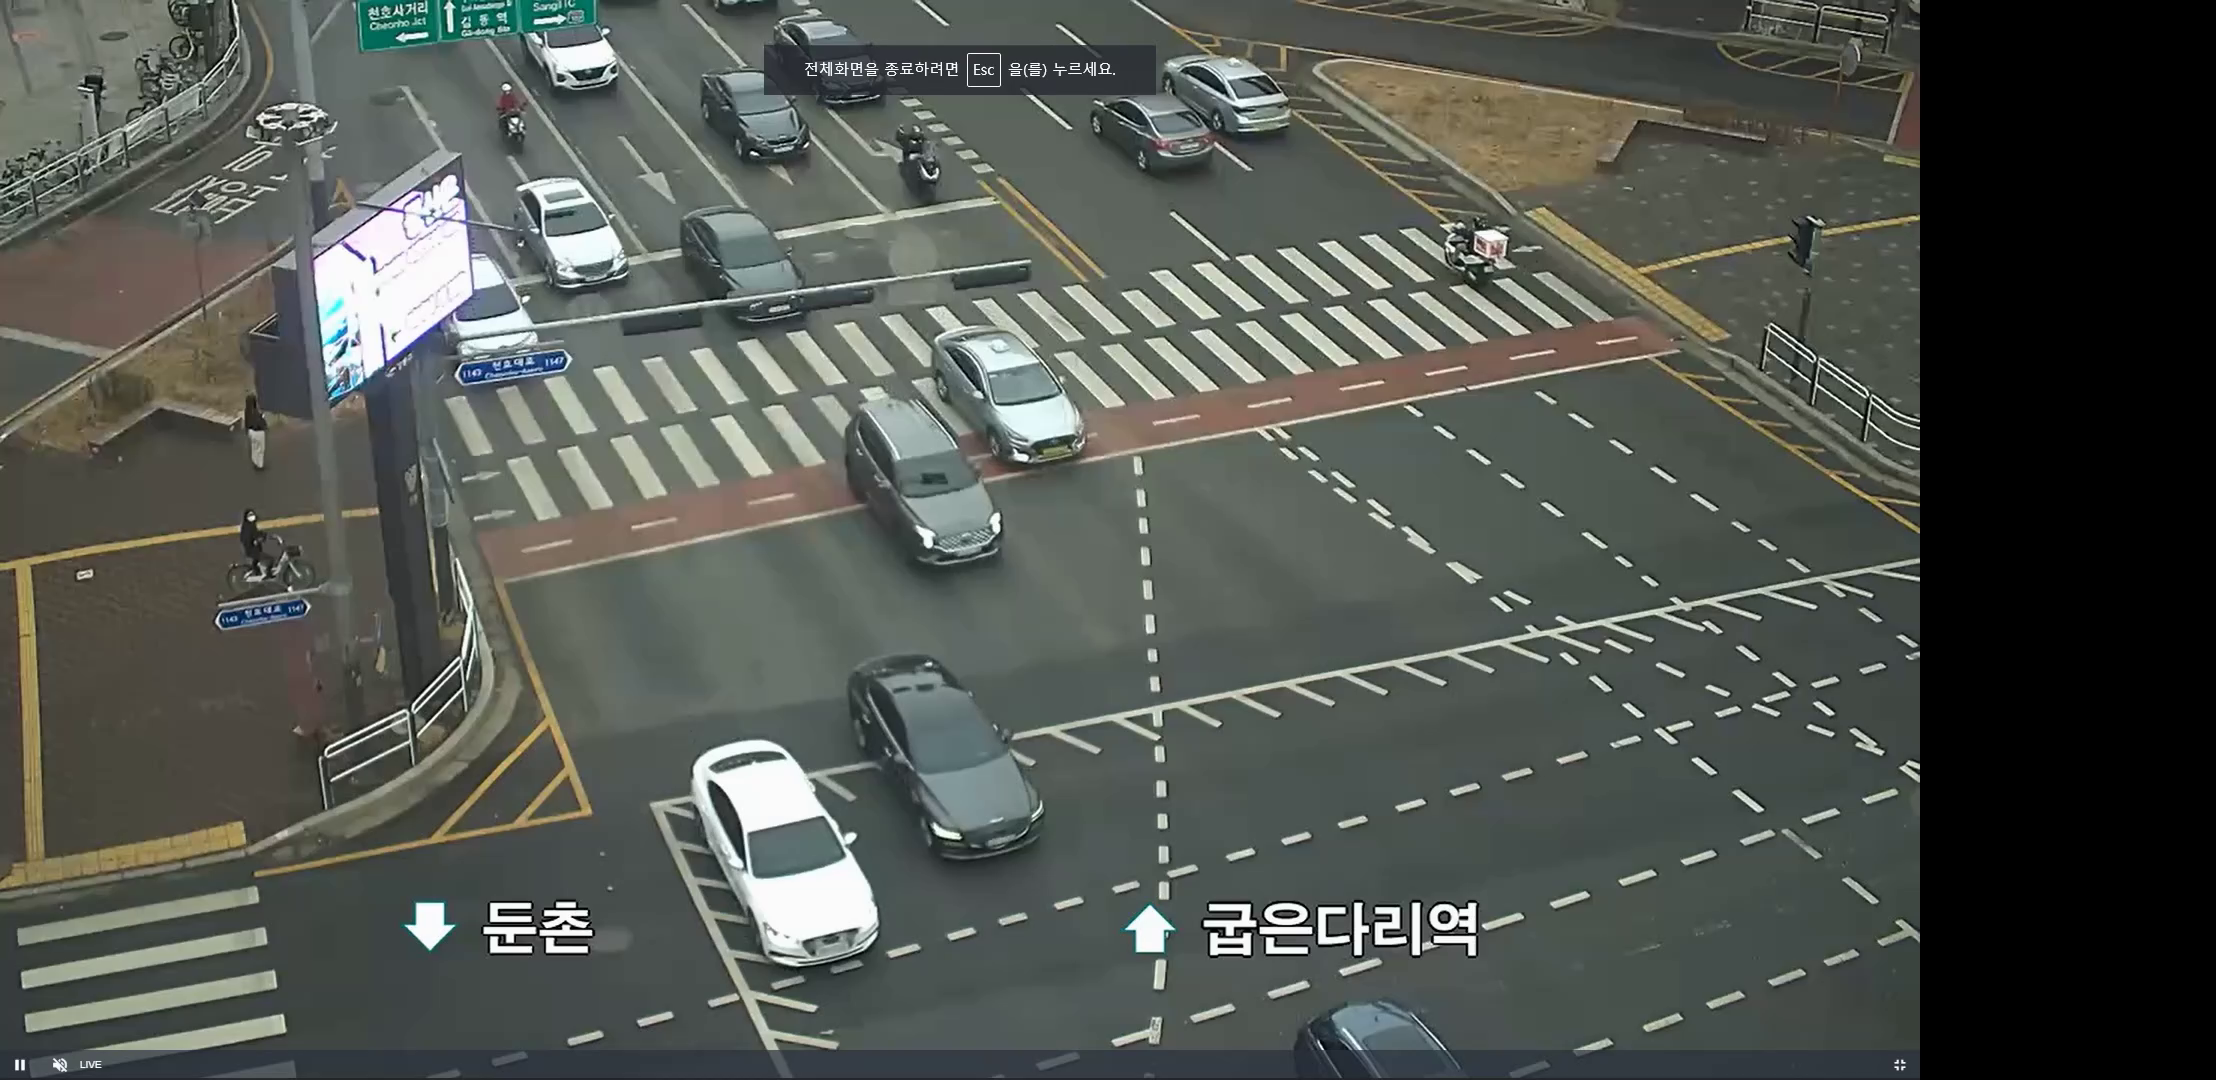

In [27]:
#비디오에서 이미지 하나 첫 프레임 가져오기


#비디오에서 영상 가져오기
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

#영상이 열려 있나 확인 하기
print("비디오가 열려 있나요?: ", video.isOpened())

# read를 통해 프레임을 하나씩 읽으면서 ret값은 프레임을 읽었는지 못 읽었는지 확인, True이면 제대로 읽은 것, 이미지는 frame에 저장
ret,frame = video.read()
print(int(video.get(cv2.CAP_PROP_POS_FRAMES)), " 번째 프레임을 읽었습니다.")
print("프레임을 읽었는지요?: ", ret)
print("읽은 프레임의 이미지데이터(numpy형태)는? ","\n", frame)

#이미지 보여주기, cv2.imshow는 로컬에서 진행. 코랩에서는 cv2_imshow 안됨
cv2_imshow(frame)
#비디오를 메모리에서 제거하기
video.release()



##### **[참조] 특정 번째 프레임을 추출하고 싶을떼**

비디오가 열려 있나요?:  True
11  번째 프레임을 읽었습니다.


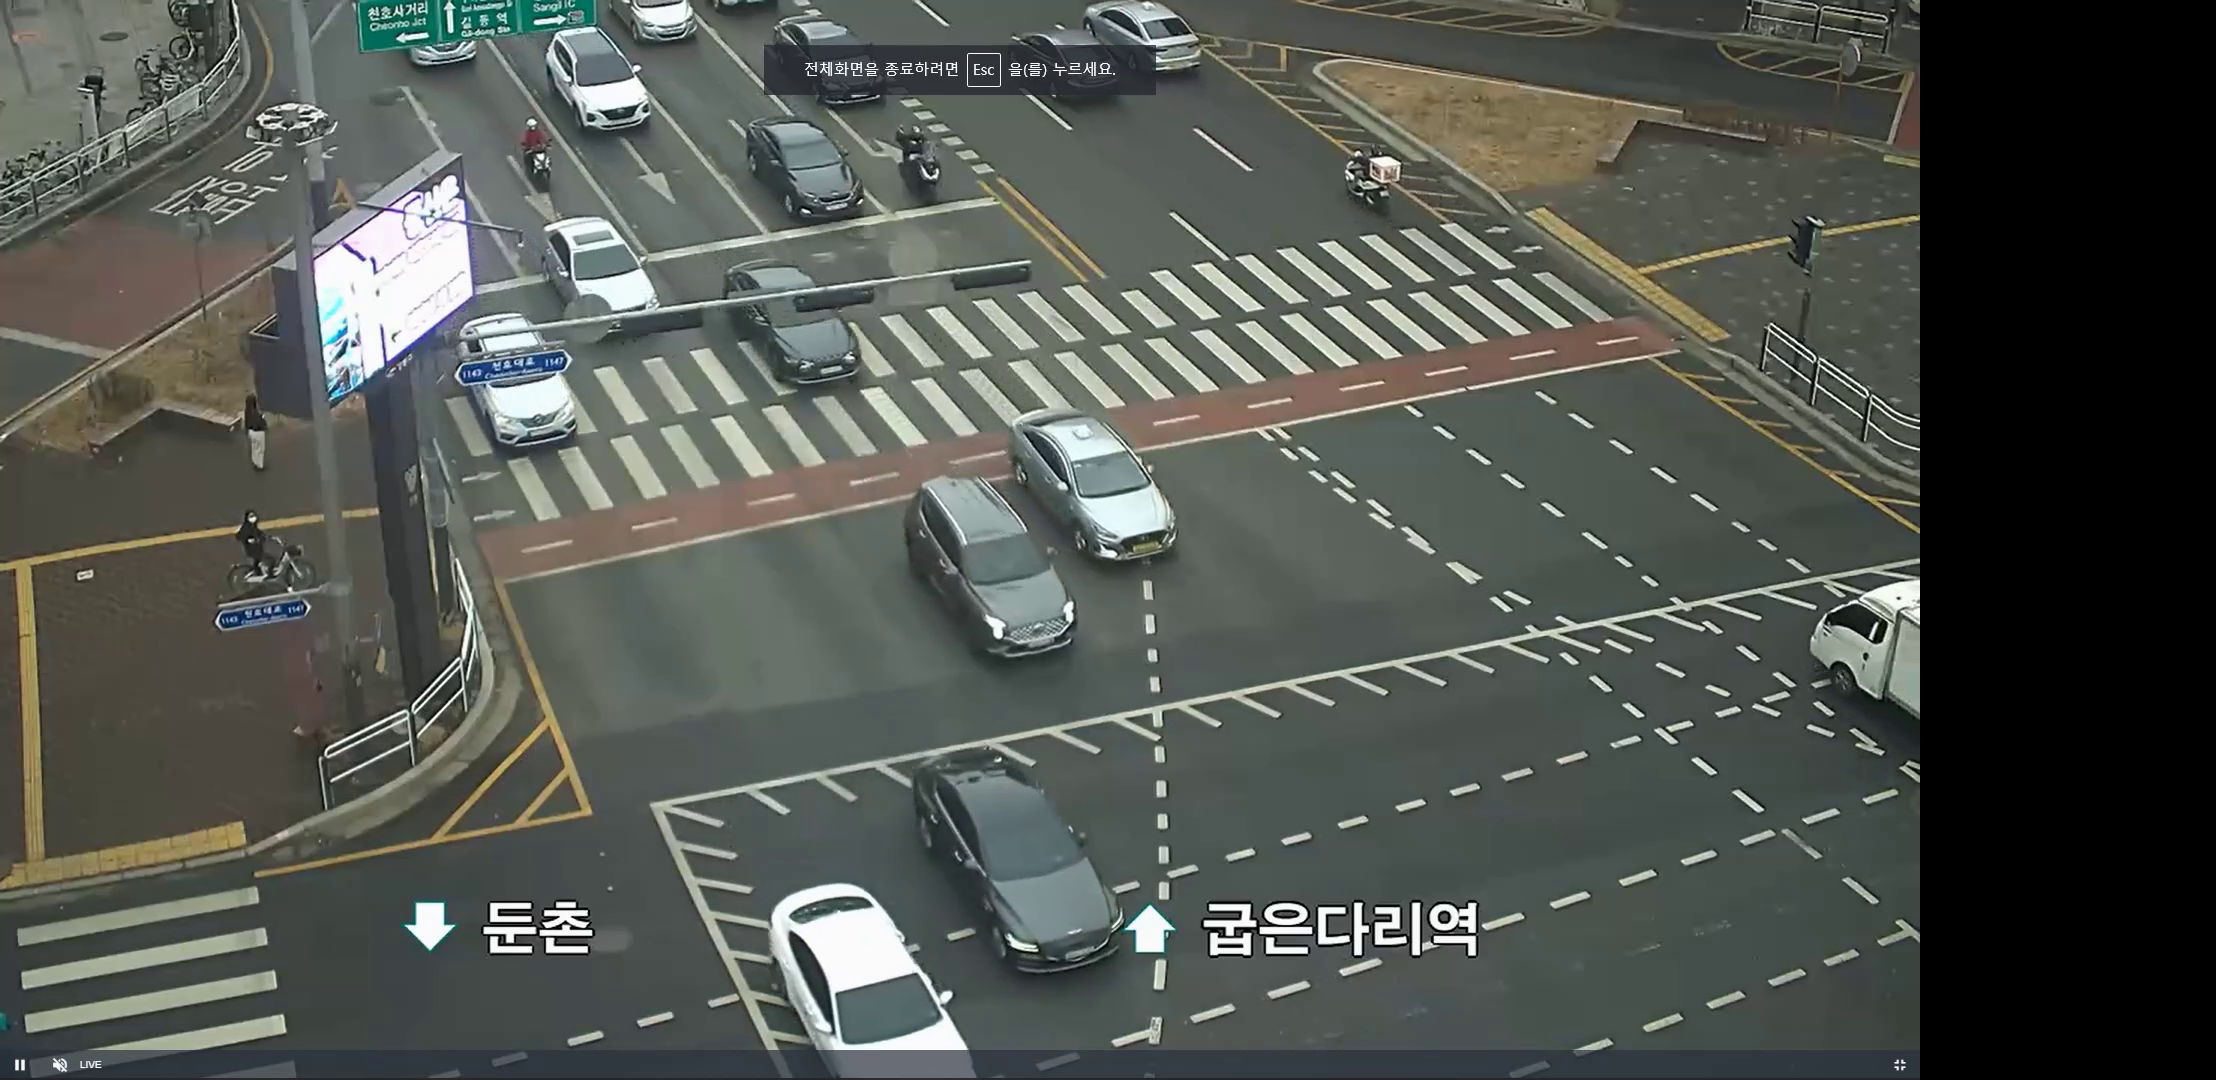

In [29]:
#비디오에서 특정 이미지 가져오기


#비디오에서 영상 가져오기
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

#영상이 열려 있나 확인 하기
print("비디오가 열려 있나요?: ", video.isOpened())

################ 함께 해보기 - 500번째 프래임 그림을 가지고 오세요
# 특정번째 프레임을 가지고 오고 싶을땐때는 video.set(cv2.CAP_PROP_POS_FRAMES, 프레임-1) 를 활용한다.(0부터 시작)

video.set(cv2.CAP_PROP_POS_FRAMES, 10)

ret,frame = video.read()
print(int(video.get(cv2.CAP_PROP_POS_FRAMES)), " 번째 프레임을 읽었습니다.")

#이미지 보여주기, cv2.imshow는 로컬에서 가능, 코랩에서는 cv2_imshow로 진행
cv2_imshow(frame)

#비디오를 메모리에서 제거하기
video.release()


#### <font color="red">**[미션 3.2] 동영상에서 모든 프레임이미지를 CCTV>image 폴더에 저장하시고 몇개의 이미지인지 확인해 보세요.**</font>


- **1단계:프레임수(=저장할 이미지수)를 확인하고 저장할 폴더를 지정합니다.**
 - 사전에 구글 드라이브 CCTV밑에 image라는 폴더를 만들어 주세요

In [31]:
import os

#비디오에서 영상 가져오기

video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")



#프레임 이미지저장할 위치 지정하기, 사전에 CCTV 폴더 밑에 image 폴더 생성해 두기

TUTORIAL_IMAGE = ROOT_PATH +"/image"


#저장할 image 폴더 여부와 비디오 오픈 여부 확인
print("이미지폴더 생성 여부:", os.path.exists(TUTORIAL_IMAGE))
print("영상 열려있는 여부:", video.isOpened())

#전체 영상 프레임 수 확인하기
print(video.get(cv2.CAP_PROP_FRAME_COUNT))


이미지폴더 생성 여부: True
영상 열려있는 여부: True
274.0


- **2단계:while(video.isOpened())를 활용해 하나씩 프레임을 읽으면서 저장합니다.**
 - 
사이즈가 큰 경우 가져올때 image = cv2.resize(frame, (500,400))을 활용하여 용량을 줄여 저장합니다.

In [32]:
# 화면에 보여주는 imshow 호출하고 화면에 보여줍니다.imwrite 활용하여 파일 저장하기

# 화면에 보여주는 imshow 호출
from google.colab.patches import cv2_imshow

video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

while(video.isOpened()):
  ret,frame = video.read()   # 비디오를 계속 한 프레임씩 열면서 화면에 뿌린다. 더이상 변환할 프레임이미지가 없으면 오픈된 비디오에서 프레임읽는 것을 빠져나온다.

  ################# 함께 해보기 - cv2.resize를 통해 프레임을 줄여줍니다. 
  # 화면에 보여 주기 위해 이미지 사이즈는 줄여서 진행 500x400으로 변경 ㅡ frame를 가지고 와서 사이즈 줄여서 image 에 저장
  image =  cv2.resize(frame, (500,400))

  # 이미지 보여주기, 프레임이 많으면 다운될 수 있어서 해당 코드는 주석 처리하는 것을 권장함
  # cv2_imshow(image)
      
  ################## 함께 해보기 - 이미지 폴더에 현재프레임번호로 저장한 것을 저장 여부를 프린트 함
  # 이미지 폴더에 프레임번호.jpg로 저장하고 저장되었다는 것을 보여주기
  cv2.imwrite(TUTORIAL_IMAGE+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", image) #imwirte -> 이미지폴더에 저장
  print(TUTORIAL_IMAGE+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg")

  ################## 함께 해보기 - 현재 프레임이 전체 프레임수와 동일하면 끝냄.  cv2.CAP_PROP_POS_FRAMES, cv2.CAP_PROP_FRAME_COUNT 활용
  # 현재의 프레임 위치가 마지막 위치이면 While를 빠져나옴

  if video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT):  
    break
#비디오를 메모리에서 제거하기
video.release()


/content/drive/MyDrive/CCTV/image/1.jpg
/content/drive/MyDrive/CCTV/image/2.jpg
/content/drive/MyDrive/CCTV/image/3.jpg
/content/drive/MyDrive/CCTV/image/4.jpg
/content/drive/MyDrive/CCTV/image/5.jpg
/content/drive/MyDrive/CCTV/image/6.jpg
/content/drive/MyDrive/CCTV/image/7.jpg
/content/drive/MyDrive/CCTV/image/8.jpg
/content/drive/MyDrive/CCTV/image/9.jpg
/content/drive/MyDrive/CCTV/image/10.jpg
/content/drive/MyDrive/CCTV/image/11.jpg
/content/drive/MyDrive/CCTV/image/12.jpg
/content/drive/MyDrive/CCTV/image/13.jpg
/content/drive/MyDrive/CCTV/image/14.jpg
/content/drive/MyDrive/CCTV/image/15.jpg
/content/drive/MyDrive/CCTV/image/16.jpg
/content/drive/MyDrive/CCTV/image/17.jpg
/content/drive/MyDrive/CCTV/image/18.jpg
/content/drive/MyDrive/CCTV/image/19.jpg
/content/drive/MyDrive/CCTV/image/20.jpg
/content/drive/MyDrive/CCTV/image/21.jpg
/content/drive/MyDrive/CCTV/image/22.jpg
/content/drive/MyDrive/CCTV/image/23.jpg
/content/drive/MyDrive/CCTV/image/24.jpg
/content/drive/MyDrive/CC

In [33]:
# 추출된 이미지 수 확인하기


import os
file_list = os.listdir(TUTORIAL_IMAGE)
print(len(file_list))



274


#### <font color="red">**[미션 3.3] 동영상에서 일부 프레임이미지를 다른 폴더에 저장하시고 몇개의 이미지인지 확인해 보세요.**</font>

- (1번) 프레임번호가 100 부터 200 까지 값만 가지고 저장해 보세요 (CCTV>image100 이라는 폴더에)
- (2번) 30개째 프레임만 저장해보세요. (30, 60, 90... 번째 프레임을  CCTV>image30 폴더에)

##### **(1번)프레임번호가 100~200까지 이미지 저장하기(CCTV>image100)**

In [35]:
# 특정 프레임 에서 플레이 하는 방법은 video.set(cv2.CAP_CAP_PROP_POS_FRAMES, 프레임)

from google.colab.patches import cv2_imshow
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

################ 함께 해보기 - video.set과 cv2.CAP_PROP_POS_FRAMES를 활용하여 시작 프레임을 세팅 (imgage200이라는 폴더 생성해 두기)
# set 함수를 활용해 200프레임 이후의 video만 읽어오세요(cv2.CAP_PROP_POS_FRAMES	현재 프레임을 나타나는 함수도 함께 활용)

video.set(cv2.CAP_PROP_POS_FRAMES, 99)

# 세팅된 프레임부터 300 까지 비디오를 열면서 이미지 저장하기 
while(video.isOpened()):
  ret,frame = video.read()
  if ret and video.get(cv2.CAP_PROP_POS_FRAMES) <= 200:
    cv2.imwrite("/content/drive/MyDrive/CCTV/image200"+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", frame)
    print("/content/drive/MyDrive/CCTV/image200"+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", "로 저장되었음")

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
      break

video.release()


/content/drive/MyDrive/CCTV/image200/100.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/101.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/102.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/103.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/104.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/105.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/106.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/107.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/108.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/109.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/110.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/111.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/112.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/113.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/114.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/115.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/116.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/117.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image200/118.jpg 로

##### **(2번)프레임번호가 30, 60, 90 ... 이미지 저장하기(CCTV>image30)**

In [37]:
video = cv2.VideoCapture(TUTORIAL_PATH + "/car_bike.mp4")

while(video.isOpened()):
  ret,frame = video.read()
  

  if(video.get(cv2.CAP_PROP_POS_FRAMES) % 30 ==0):
      #cv2_imshow(frame)
      cv2.imwrite("/content/drive/MyDrive/CCTV/image30"+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", frame)
      print("/content/drive/MyDrive/CCTV/image30"+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", "로 저장되었음")

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
      break

video.release()


/content/drive/MyDrive/CCTV/image30/30.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image30/60.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image30/90.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image30/120.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image30/150.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image30/180.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image30/210.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image30/240.jpg 로 저장되었음
/content/drive/MyDrive/CCTV/image30/270.jpg 로 저장되었음


---

## <font color="Blue">**4. 확보한 이미지 데이터 한눈에 확인하기**
* 이미지 파일의 이름과 경로 데이터를 확보한 후에 CCTV>image30에 저장된 이미지 데이터를 화면에 뿌려 확인합니다.
   
    >* glob를 통해 파일 패스 저장하기 
    >* imshow와 subplot를 통해 그림들을 리스트업하기

#### <font color="green">**[실습 4] "image30" 폴더내의 이미지들을 img_list에 저장합니다**

In [42]:
# 이미지 리스트를 우선 가지고 옴 (이미지 30폴더)

# 이미지 리스트를 우선 가지고 옴
import glob

# glob는 특정 파일의 전체 Path를 가지고 와서 리스트로 저장함
img_list30 = glob.glob("/content/drive/MyDrive/CCTV/image30/*.jpg")

print("전체 이미지수: ",len(img_list))
print("샘플 패스 확인: ",img_list[0])


전체 이미지수:  9
샘플 패스 확인:  /content/drive/MyDrive/CCTV/image30/30.jpg


#### <font color="red">**[미션 4.1]img_list에 저장된 이미지를 노트북 화면에 매트릭스 형태로 볼수 있게 해 주세요**</font>
- rows = OOO 행, Columns = OOOO 열로 해서 보여 주세요 (적당히 결정하세요)
- https://foss4g.tistory.com/1263 를 참조해 주세요

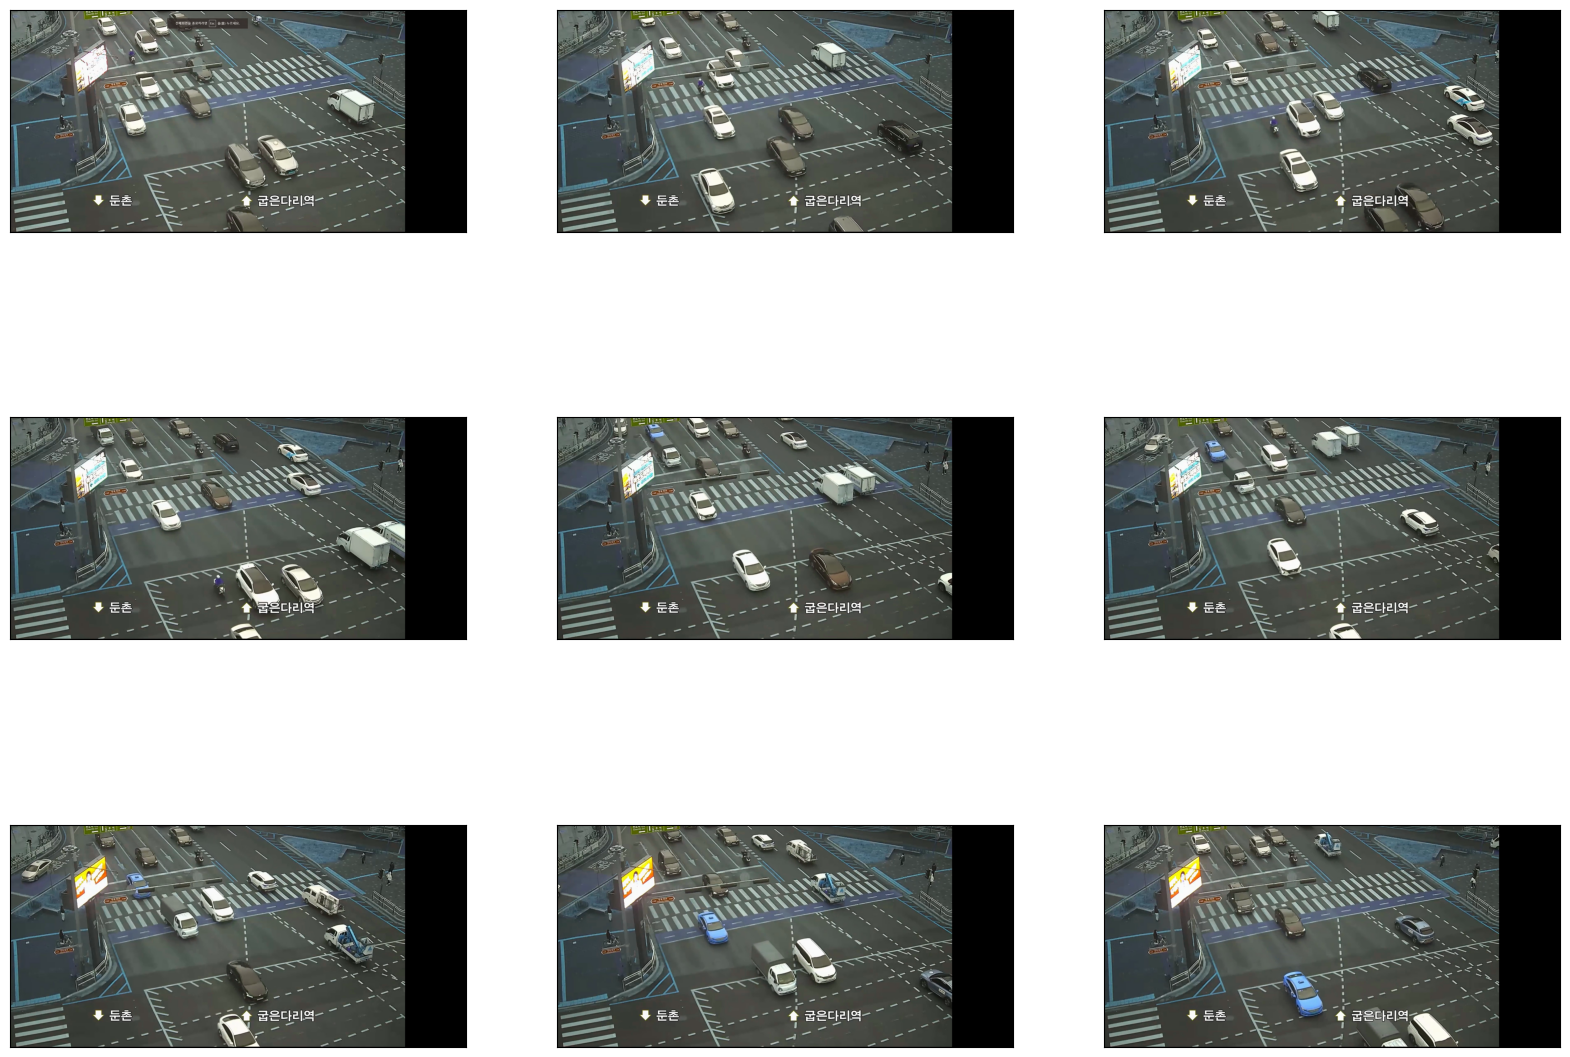

In [43]:

import matplotlib.pyplot as plt

# figure의 사이즈를 정의하고 몇 바이 몇 행렬에 그림들을 뿌릴 것인지 결정 (본 자료는 20개 이므로 4*5임)
fig = plt.figure(figsize=(20, 15))
rows = 3
cols = 3
i= 1

for filename in img_list30:
  #이미지 파일들을 하나씩 읽어서 img2에 넣고 
  img2 = cv2.imread(filename)

  #4X5 매트릭스 플롯에 하나씩 넣어 보이기
  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img2)
 
  # 눈금 제거
  ax.set_xticks([]), ax.set_yticks([])
  i +=1

plt.show()

###### **그림 하단에 파일명을 넣고 싶다면 어떻게 해야 할까?**

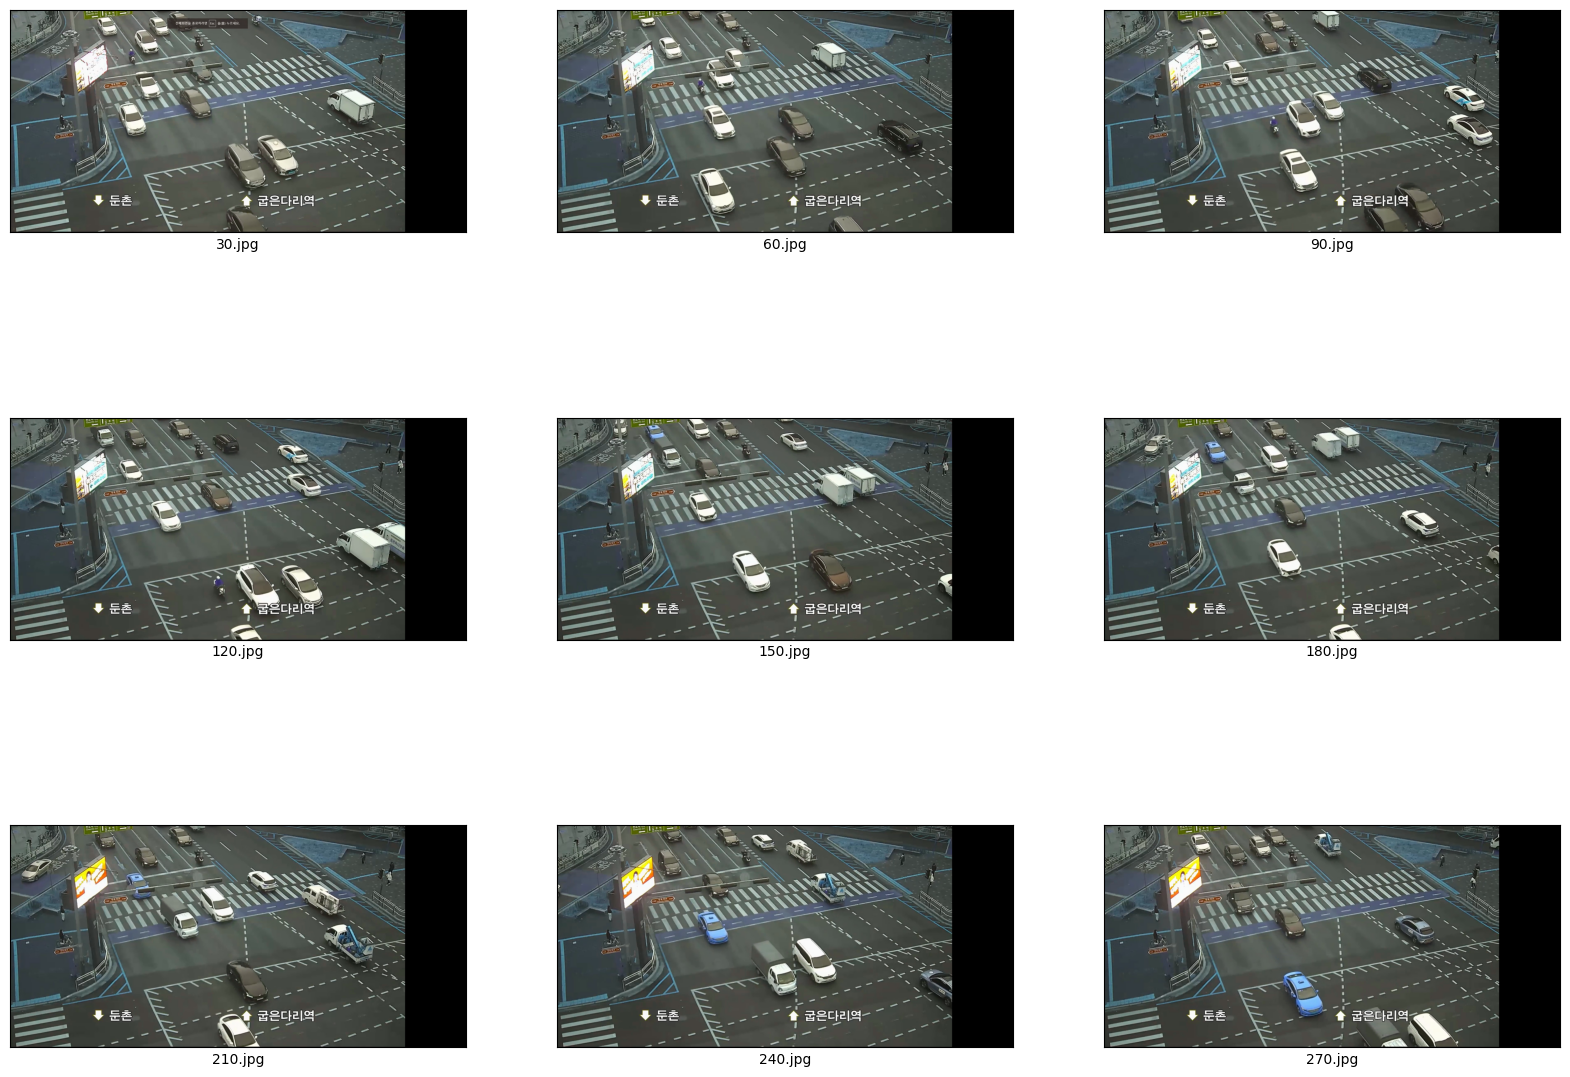

In [44]:
import matplotlib.pyplot as plt

# figure의 사이즈를 정의하고 몇 바이 몇 행렬에 그림들을 뿌릴 것인지 결정 (본 자료는 20개 이므로 4*5임)
fig = plt.figure(figsize=(20, 15))
rows = 3
cols = 3
i= 1

for filename in img_list30:
  #이미지 파일들을 하나씩 읽어서 img2에 넣고 
  img2 = cv2.imread(filename)

  #4X5 매트릭스 플롯에 하나씩 넣어 보이기
  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img2)

  ########## 함께 해보기 - 파일리스트에서 파일명만 가지고 오기 참고로 img_list_front20 = /content/drive/MyDrive/helmet/image/1.jpg 게 저장되어 있음
  #그림 하단에 파일명 추가, 마지막 문자열 값을 추출은 (img_list_front20[0].split('/')은 "/"로 구분후 마지막문자열임)
  
  xlabel = filename.split('/')[-1]

  ax.set_xlabel(xlabel)

  # 눈금 제거
  ax.set_xticks([]), ax.set_yticks([])
  i +=1

plt.show()

# <font color="red">**[미션2] 13개의 CCTV 영상으로 부터 최소 10장 이상의 이미지 샘플를 추출해 주시기 바랍니다.**
- 13개의 CCTV영상을 다운로드해 주세요.
- 13개의 CCTV영상을 구글드라이브의 "CCTV>cctv_list" 에 복사해 주세요.
- 13개 CCTV 영상에서 10개의 이미지 샘플를 추출해 주시기 바랍니다.
  (하나씩 돌려서 뽑을수 도 있겠지만, for cctv in cctv_list: 로 해서 하나씩 영상을 가지고 자동으로 추출할수 있도록 프로그래밍해주세요) 
- 추출시 "추출한영상파일명_프레임위치.jpg(예시: CCTV영상2_30.jpg)" 로 저장해주세요.
- 저장 위치는 CCTV > cctv_data 입니다

## **1. 환경설정하기**

### **1.1 구글 드라이브 연결**

In [ ]:
# 코랩 사용 시 구글 드라이브 연결





### **1.2 필요한 라이브러리 임포트**

In [ ]:
# 필요 라이브러리 불러오기.





### **1.3 동영상위치 및 저장할 위치 확인**
- /content/drive/MyDrive/CCTV/cctv_list : 동영상 위치
  - LABEL_PATH = "/content/drive/MyDrive/CCTV/cctv_list 로 저장 하고 확인하기
- /content/drive/MyDrive/CCTV/cctv_data : 이미지 위치
  - LABEL_IMAGE_PATH = "/content/drive/MyDrive/CCTV/cctv_data" 저장하고 확인하기

In [72]:
import os

# CCTV리스트 영상 경로
if os.path.exists("/content/drive/MyDrive/CCTV/cctv_list") :  #경로가 있는지 확인  
  LABEL_PATH = "/content/drive/MyDrive/CCTV/cctv_list"
  print(LABEL_PATH+"폴더가 잘생성되어 있습니다.")
else :
  print("/content/drive/MyDrive/CCTV에 'cctv_list' 폴더를 생성해 주시고 해당 폴더안에 cctv영상들을 넣어 주세요")

#labeling할 이미지 저장 경로(영상에서부터 캡쳐한 이미지들)
if os.path.exists("/content/drive/MyDrive/CCTV/cctv_data") :  #경로가 있는지 확인  
  LABEL_IMAGE_PATH = "/content/drive/MyDrive/CCTV/cctv_data"
  print(LABEL_IMAGE_PATH+"폴더가 잘생성되어 있습니다.")
else :
  print("/content/drive/MyDrive/CCTV에 'cctv_data' 폴더를 생성해 주세요")

/content/drive/MyDrive/CCTV/cctv_list폴더가 잘생성되어 있습니다.
/content/drive/MyDrive/CCTV/cctv_data폴더가 잘생성되어 있습니다.


## **2.동영상 데이터 정보 확인하기**

- 다음과 같은 형태로 모든 영상 정보가 리스트업 되게 함

CCTV영상9.mp4 정보:  True<BR>
 -가로 : 2216.0<BR>
 -세로 : 1080.0<BR>
 -총 프레임 수 : 374.0<BR>
 -FPS : 23.976023976023978<BR>
 -영상 길이 : 16 초 <BR>


In [116]:
cctv

'/content/drive/MyDrive/CCTV/cctv_list/CCTV영상13.mp4'

In [104]:
cctv_list[0].find('list')

33

In [121]:
os.path.exists("/content/drive/MyDrive/CCTV/*.mp4")

False

In [110]:
cctv_list[0][38:]

'CCTV영상7.mp4'

In [133]:
#  영상들이 모여있는 폴더에서 파일명을 리스트로 가지고 오기(os.listdir를 활용, 이 명령은 디렉토리명은 없고 단지 파일명만 가지고온다.)


cctv_list = glob.glob("/content/drive/MyDrive/CCTV/cctv_list/*.mp4")

for cctv in cctv_list:

  # 13개 영상의 정보 가져오기
  video = cv2.VideoCapture(cctv)

  ########### 함께 해보기 - 저장된 비디오의 정보 몇개만 확인해보기
  # 영상의 가로, 세로, 총 프레임 수, FPS 정보로 가지고 옵니다.
  
  video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH) # 미프
  video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
  video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)
  video_fps = video.get(cv2.CAP_PROP_FPS)

  ## print (is.Opend 뭐시기) 
  print("가로 :", video_width)
  print("세로 :", video_height)
  print("총 프레임 수 :", video_length)
  print("FPS :", video_fps)
  print('-' * 50)
  #해당 비디오를 가지고 이용한 후에는 해당 비디오를 메모리에세 제거하기 위해 release함수를 호출합니다.

파일명 : CCTV영상7.mp4
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 274.0
FPS : 23.976023976023978
--------------------------------------------------
파일명 : CCTV영상8.mp4
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 340.0
FPS : 23.976023976023978
--------------------------------------------------
파일명 : CCTV영상6.mp4
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 262.0
FPS : 23.976023976023978
--------------------------------------------------
파일명 : CCTV영상5.mp4
가로 : 1920.0
세로 : 1080.0
총 프레임 수 : 614.0
FPS : 30.0
--------------------------------------------------
파일명 : CCTV영상4.mp4
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 498.0
FPS : 23.976023976023978
--------------------------------------------------
파일명 : CCTV영상2.mp4
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 285.0
FPS : 23.976023976023978
--------------------------------------------------
파일명 : CCTV영상3.mp4
가로 : 2216.0
세로 : 1080.0
총 프레임 수 : 323.0
FPS : 23.976023976023978
--------------------------------------------------
파일명 : CCTV영상1.mp4
가로 : 2216.0
세로 : 1080.0
총 

## **3.동영상로 부터 이미지 데이터 추출하기**
 - 각 동영상의 Frame수를 가지고 10등분 이상하여 10개의 이미지만 추출하기 
 - 방법은 전체 Frame수를 10을 나눈 값을이 추출 되는 프레임 번호가 됨
 - Frame 번호에 따른 배수로 가지고 오는 방법도 있음
 - 프레임수가 120이면, 10개를 취할려면 12,24,36... 형태로 가지고 와야함
 - 추출된 이미지는 모두 하나의 폴더인 cctv_data에 저장함

In [49]:
#[참조1] Frequncy 도출하는 코드, 즉 총 프레임수가 281개 이므로 프레임이 28번의 배수 일때만다 가져오는 코드임

video = cv2.VideoCapture("/content/drive/MyDrive/CCTV/cctv_list/*.mp4")
print(video.get(cv2.CAP_PROP_FRAME_COUNT))

# 몇장을 추출할것인지요
n = 10

# 현 비디오의 전체 Frame 수 정보 가져오기
video.get(cv2.CAP_PROP_FRAME_COUNT)

# 몇번마다 추출할것인지
frequency = int(video.get(cv2.CAP_PROP_FRAME_COUNT)/n)

print(frequency)

video.release()


281.0
28


In [ ]:
#[참조2] 하나의 영상에만 적용하여 정확히 나오는지 확인하는 코드

video = cv2.VideoCapture("/content/drive/MyDrive/CCTV/cctv_list/CCTV영상1.mp4")

while(video.isOpened()):
  ret,frame = video.read()


  image = cv2.resize(frame, (450, 300))

  # 몇장을 추출할것인지요
  n = 10

  # 현 비디오의 전체 Frame 수 정보 가져오기
  video.get(cv2.CAP_PROP_FRAME_COUNT)

  # 몇번마다 추출할것인지
  frequency = int(video.get(cv2.CAP_PROP_FRAME_COUNT)/n)

  if(int(video.get(cv2.CAP_PROP_POS_FRAMES)) % frequency ==0):
    cv2_imshow(image)
    print('저장된 프레임 위치 : ' + str(video.get(cv2.CAP_PROP_POS_FRAMES)))
    #cv2.imwrite(LABEL_IMAGE_PATH+"/"+ FILE_NAME.split('.')[0] + str(video.get(cv2.CAP_PROP_POS_FRAMES))+".jpg", image)

  if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
      break

    

video.release()

In [58]:
# 내가 작성한 코드

for cctv_list in glob.glob("/content/drive/MyDrive/CCTV/cctv_list/*.mp4"):
  for cctv in cctv_list:
    video = cv2.VideoCapture("/content/drive/MyDrive/CCTV/cctv_list/C.mp4")

    while(video.isOpened()):
      ret,frame = video.read()

      image = cv2.resize(frame, (450, 300))

      # 몇장을 추출할것인지요
      n = 10

      # 현 비디오의 전체 Frame 수 정보 가져오기
      video.get(cv2.CAP_PROP_FRAME_COUNT)

      # 몇번마다 추출할것인지
      frequency = int(video.get(cv2.CAP_PROP_FRAME_COUNT)/n)

      if(int(video.get(cv2.CAP_PROP_POS_FRAMES)) % frequency ==0):
        #cv2_imshow(image)
        print('저장된 프레임 위치 : ' + str(video.get(cv2.CAP_PROP_POS_FRAMES)))
        cv2.imwrite("/content/drive/MyDrive/CCTV/cctv_data"+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", frame)
        print("/content/drive/MyDrive/CCTV/cctv_data"+"/"+ str(int(video.get(cv2.CAP_PROP_POS_FRAMES)))+".jpg", "로 저장되었음")


      if(video.get(cv2.CAP_PROP_POS_FRAMES) == video.get(cv2.CAP_PROP_FRAME_COUNT)):
          break

video.release()

AttributeError: ignored

In [79]:
cctv_list = glob.glob("/content/drive/MyDrive/CCTV/cctv_list/*.mp4")


for cctv in cctv_list:
    video = cv2.VideoCapture(cctv)

    while(video.isOpened()):
        ret,frame = video.read()

        image = cv2.resize(frame, (450, 300))
        n = 10

        total_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
        
        frequency = int(total_frames / n)

        if(int(video.get(cv2.CAP_PROP_POS_FRAMES)) % frequency ==0):
            #cv2_imshow(image)
            print('저장된 프레임 위치: ' + str(video.get(cv2.CAP_PROP_POS_FRAMES)))
            frame_position = int(video.get(cv2.CAP_PROP_POS_FRAMES))
            filename = cctv.split("/")[-1].split(".")[0]
            cv2.imwrite(f"/content/drive/MyDrive/CCTV/cctv_data/{filename}_{frame_position}.jpg", frame)
            print(f"/content/drive/MyDrive/CCTV/cctv_data/{filename}_{frame_position}.jpg", "Saved as")

        if(video.get(cv2.CAP_PROP_POS_FRAMES) == total_frames):
            break

    video.release()

저장된 프레임 위치: 27.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상7_27.jpg Saved as
저장된 프레임 위치: 54.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상7_54.jpg Saved as
저장된 프레임 위치: 81.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상7_81.jpg Saved as
저장된 프레임 위치: 108.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상7_108.jpg Saved as
저장된 프레임 위치: 135.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상7_135.jpg Saved as
저장된 프레임 위치: 162.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상7_162.jpg Saved as
저장된 프레임 위치: 189.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상7_189.jpg Saved as
저장된 프레임 위치: 216.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상7_216.jpg Saved as
저장된 프레임 위치: 243.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상7_243.jpg Saved as
저장된 프레임 위치: 270.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상7_270.jpg Saved as
저장된 프레임 위치: 34.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상8_34.jpg Saved as
저장된 프레임 위치: 68.0
/content/drive/MyDrive/CCTV/cctv_data/CCTV영상8_68.jpg

In [80]:
# 추출된 이미지 수 확인하기

image130 = ROOT_PATH +"/cctv_data"

file_list = os.listdir(image130)
print(len(file_list))

130


In [129]:
cctv_list = glob.glob("/content/drive/MyDrive/CCTV/cctv_list/*.mp4")

a = 0

for cctv in cctv_list:
    video = cv2.VideoCapture(cctv)

    while(video.isOpened()):
        ret,frame = video.read()

        image = cv2.resize(frame, (450, 300))
        n = 10

        total_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
        
        frequency = int(total_frames / n)

        if(int(video.get(cv2.CAP_PROP_POS_FRAMES)) % frequency ==0):
            #cv2_imshow(image)
            print('저장된 프레임 위치: ' + str(video.get(cv2.CAP_PROP_POS_FRAMES)))
            frame_position = int(video.get(cv2.CAP_PROP_POS_FRAMES))
            filename = cctv.split("/")[-1].split(".")[0]
            cv2.imwrite(f"/content/drive/MyDrive/CCTV/cctv_data2/{filename}_{frame_position}.jpg", frame)
            print(f"/content/drive/MyDrive/CCTV/cctv_data2/{filename}_{frame_position}.jpg", "Saved as")
            a = a + 1
            print(a,"번")

        if(video.get(cv2.CAP_PROP_POS_FRAMES) == total_frames) or a == 10 :
            break

    video.release()

저장된 프레임 위치: 27.0
/content/drive/MyDrive/CCTV/cctv_data2/CCTV영상7_27.jpg Saved as
1 번
저장된 프레임 위치: 54.0
/content/drive/MyDrive/CCTV/cctv_data2/CCTV영상7_54.jpg Saved as
2 번
저장된 프레임 위치: 81.0
/content/drive/MyDrive/CCTV/cctv_data2/CCTV영상7_81.jpg Saved as
3 번
저장된 프레임 위치: 108.0
/content/drive/MyDrive/CCTV/cctv_data2/CCTV영상7_108.jpg Saved as
4 번
저장된 프레임 위치: 135.0
/content/drive/MyDrive/CCTV/cctv_data2/CCTV영상7_135.jpg Saved as
5 번
저장된 프레임 위치: 162.0
/content/drive/MyDrive/CCTV/cctv_data2/CCTV영상7_162.jpg Saved as
6 번
저장된 프레임 위치: 189.0
/content/drive/MyDrive/CCTV/cctv_data2/CCTV영상7_189.jpg Saved as
7 번
저장된 프레임 위치: 216.0
/content/drive/MyDrive/CCTV/cctv_data2/CCTV영상7_216.jpg Saved as
8 번
저장된 프레임 위치: 243.0
/content/drive/MyDrive/CCTV/cctv_data2/CCTV영상7_243.jpg Saved as
9 번
저장된 프레임 위치: 270.0
/content/drive/MyDrive/CCTV/cctv_data2/CCTV영상7_270.jpg Saved as
10 번
